In [694]:
import pandas as pd

# Data Preparation

In [881]:
#Upload data from CSO related to Ireland air travel and frefgt
Ireland = pd.read_csv('Ireland.csv')
Ireland.head()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE
0,Passengers,2013M01,All main airports,All Countries,All directions,All flights,Thousand,1398.7
1,Passengers,2013M01,All main airports,All Countries,All directions,Scheduled,Thousand,1372.4
2,Passengers,2013M01,All main airports,All Countries,All directions,Unscheduled,Thousand,26.3
3,Passengers,2013M01,All main airports,All Countries,Arrival,All flights,Thousand,687.1
4,Passengers,2013M01,All main airports,All Countries,Arrival,Scheduled,Thousand,674.0


In [882]:
#Look at the dataset for better undestanding 
Ireland.describe()

,VALUE
count,783756.000000
mean,11.971878
std,114.398150
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4040.600000


In [696]:
#Upload dataset from Fin Stat related to Finnish air travel and freight
Finland = pd.read_csv('Finland.csv', encoding='latin-1')
Finland.head()

,Month,Reporting airport,Type of flight,Arrival/departure,Total Number of passengers,"Total Freight and mail total, tonne","Total Number of passengers, cumulative from the beginning of the year","Total Freight and mail, cumulative from the beginning of the year, tonnes",Helsinki-Vantaa Number of passengers,"Helsinki-Vantaa Freight and mail total, tonne","Helsinki-Vantaa Number of passengers, cumulative from the beginning of the year","Helsinki-Vantaa Freight and mail, cumulative from the beginning of the year, tonnes",Other domestic airports Number of passengers,"Other domestic airports Freight and mail total, tonne","Other domestic airports Number of passengers, cumulative from the beginning of the year","Other domestic airports Freight and mail, cumulative from the beginning of the year, tonnes",International Number of passengers,"International Freight and mail total, tonne","International Number of passengers, cumulative from the beginning of the year","International Freight and mail, cumulative from the beginning of the year, tonnes"
0,2019M01,Total,Total,Arrivals/departures total,1969169,16265,1969169,16265,276932,55,276932,55,279130,177,279130,177,1413107,16033,1413107,16033
1,2019M01,Total,Total,Arrivals,984340,7550,984340,7550,129975,41,129975,41,147386,13,147386,13,706979,7495,706979,7495
2,2019M01,Total,Total,Departures,984829,8715,984829,8715,146957,13,146957,13,131744,164,131744,164,706128,8538,706128,8538
3,2019M01,Total,Scheduled flight,Arrivals/departures total,1857115,14743,1857115,14743,276649,55,276649,55,278772,177,278772,177,1301694,14511,1301694,14511
4,2019M01,Total,Scheduled flight,Arrivals,931756,6733,931756,6733,129719,41,129719,41,147185,13,147185,13,654852,6678,654852,6678


In [883]:
#Look at the dataset for better undestanding 
Finland.describe()

,Passengers Finland,Freight Finland
count,1.062000e+04,10620.000000
mean,2.652275e+04,333.323446
std,1.478209e+05,1891.322877
min,0.000000e+00,0.000000
25%,1.800000e+01,0.000000
50%,1.089500e+03,0.000000
75%,4.927500e+03,1.000000
max,2.117613e+06,21596.000000


In [697]:
#To ensure that there are only two variables on Statistic Label column
unique_values = Ireland['Statistic Label'].unique()
print(unique_values)

['Passengers' 'Freight']


In [698]:
#To undestand data types
Ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783756 entries, 0 to 783755
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Statistic Label      783756 non-null  object 
 1   Month                783756 non-null  object 
 2   Airports in Ireland  783756 non-null  object 
 3   Country              783756 non-null  object 
 4   Direction            783756 non-null  object 
 5   Flight Type          783756 non-null  object 
 6   UNIT                 783756 non-null  object 
 7   VALUE                783756 non-null  float64
dtypes: float64(1), object(7)
memory usage: 47.8+ MB


In [699]:
# Create 'Passengers' and 'Freight' columns based on 'Statistic Label' data
Ireland['Passengers'] = (Ireland['Statistic Label'] == 'Passengers') * Ireland['VALUE']
Ireland['Freight'] = (Ireland['Statistic Label'] == 'Freight') * Ireland['VALUE']

Ireland.tail()

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE,Passengers,Freight
783751,Freight,2023M03,Shannon,Oceania and Polar regions (1),Arrival,Scheduled,000 Tonnes,0.0,0.0,0.0
783752,Freight,2023M03,Shannon,Oceania and Polar regions (1),Arrival,Unscheduled,000 Tonnes,0.0,0.0,0.0
783753,Freight,2023M03,Shannon,Oceania and Polar regions (1),Departure,All flights,000 Tonnes,0.0,0.0,0.0
783754,Freight,2023M03,Shannon,Oceania and Polar regions (1),Departure,Scheduled,000 Tonnes,0.0,0.0,0.0
783755,Freight,2023M03,Shannon,Oceania and Polar regions (1),Departure,Unscheduled,000 Tonnes,0.0,0.0,0.0


In [700]:
#Drop all irrelevant columns
columns_to_drop = ["Statistic Label",
    "Country", "Direction", "Flight Type", "UNIT", "VALUE", "Type of flight"]

# Ensure column names exist in the DataFrame before dropping
columns_to_drop = [col for col in columns_to_drop if col in Ireland.columns]

# Drop the specified columns
Ireland.drop(columns=columns_to_drop, axis=1, inplace=True)
Ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783756 entries, 0 to 783755
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Month                783756 non-null  object 
 1   Airports in Ireland  783756 non-null  object 
 2   Passengers           783756 non-null  float64
 3   Freight              783756 non-null  float64
dtypes: float64(2), object(2)
memory usage: 23.9+ MB


In [701]:
#Gropu by Month and Airport
Ireland_gr=Ireland.groupby(['Month', 'Airports in Ireland']).agg({'Passengers': 'sum', 'Freight': 'sum'}).reset_index()

In [702]:
# Exclude data on All airports and increase the value of Passengers and Freight by 1000 to match Finnish dataset
Ireland_gr= Ireland_gr[Ireland_gr['Airports in Ireland'] != 'All main airports']
Ireland_gr[['Passengers', 'Freight']] *= 1000
Ireland_gr.head()

,Month,Airports in Ireland,Passengers,Freight
1,2013M01,Cork,2461600.0,400.0
2,2013M01,Dublin,19657800.0,141900.0
3,2013M01,Kerry,256200.0,0.0
4,2013M01,Knock,634800.0,0.0
5,2013M01,Shannon,1073100.0,20000.0


In [703]:
#Exclude data from 2013 to 2018 as it is not matched by Finnish dataset
import re
# Define the pattern to exclude
pattern_to_exclude = re.compile(r'^(201[3-8]|2019M(0[1-9]|1[0-2]))$')

# Use the pattern to filter rows
Ireland_gr_fil = Ireland_gr[~Ireland_gr['Month'].str.match(pattern_to_exclude)]

# Display the result
Ireland_gr_fil

,Month,Airports in Ireland,Passengers,Freight
1,2013M01,Cork,2461600.0,400.0
2,2013M01,Dublin,19657800.0,141900.0
3,2013M01,Kerry,256200.0,0.0
4,2013M01,Knock,634800.0,0.0
5,2013M01,Shannon,1073100.0,20000.0
...,...,...,...,...
733,2023M03,Cork,3334400.0,0.0
734,2023M03,Dublin,40635100.0,179300.0
735,2023M03,Kerry,459800.0,0.0
736,2023M03,Knock,1004000.0,0.0


In [704]:
#Drop all irrelevant columns in Finland dataset
columns_to_drop = ["Type of flight",
    "Arrival/departure", "Total Number of passengers, cumulative from the beginning of the year",
    "Total Freight and mail, cumulative from the beginning of the year, tonnes",
    "Helsinki-Vantaa Number of passengers", "Helsinki-Vantaa Freight and mail total, tonne",
    "Helsinki-Vantaa Number of passengers, cumulative from the beginning of the year",
    "Helsinki-Vantaa Freight and mail, cumulative from the beginning of the year, tonnes",
    "Other domestic airports Number of passengers",
    "Other domestic airports Freight and mail total, tonne",
    "Other domestic airports Number of passengers, cumulative from the beginning of the year",
    "Other domestic airports Number of passengers, cumulative from the beginning of the year",
    "Other domestic airports Freight and mail, cumulative from the beginning of the year, tonnes",
    "International Number of passengers",
    "International Freight and mail total, tonne",
    "International Number of passengers, cumulative from the beginning of the year",
    "International Freight and mail, cumulative from the beginning of the year, tonnes"
]

# Ensure column names exist in the DataFrame before dropping
columns_to_drop = [col for col in columns_to_drop if col in Finland.columns]

# Drop the specified columns
Finland.drop(columns=columns_to_drop, axis=1, inplace=True)
Finland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11151 entries, 0 to 11150
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Month                                11151 non-null  object
 1   Reporting airport                    11151 non-null  object
 2   Total Number of passengers           11151 non-null  int64 
 3   Total Freight and mail total, tonne  11151 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 348.6+ KB


In [705]:
#Drop the lines  with cumulative values, i e Totals
Finland = Finland[Finland['Reporting airport'] != 'Total']
Finland

,Month,Reporting airport,Total Number of passengers,"Total Freight and mail total, tonne"
9,2019M01,Helsinki-Vantaa,1574950,15841
10,2019M01,Helsinki-Vantaa,798402,7322
11,2019M01,Helsinki-Vantaa,776548,8518
12,2019M01,Helsinki-Vantaa,1525370,14328
13,2019M01,Helsinki-Vantaa,774769,6509
...,...,...,...,...
11146,2023M11,Vaasa,5721,0
11147,2023M11,Vaasa,5784,0
11148,2023M11,Vaasa,2735,0
11149,2023M11,Vaasa,1358,0


In [706]:
# Rename columns to match dataset Ireland
Finland.rename(columns={"Reporting airport": "Airports in Finland", "Total Number of passengers":"Passengers Finland","Total Freight and mail total, tonne":"Freight Finland" }, inplace=True)

In [707]:
#Group by months and Airport
Finland_gr=Finland.groupby(['Month', 'Airports in Finland']).agg({'Passengers Finland': 'sum', 'Freight Finland': 'sum'}).reset_index()

In [708]:
Finland_gr.head()

,Month,Airports in Finland,Passengers Finland,Freight Finland
0,2019M01,Enontekiö,7076,0
1,2019M01,Helsinki-Vantaa,6299800,63361
2,2019M01,Ivalo,136644,0
3,2019M01,Joensuu,35368,8
4,2019M01,Jyväskylä,17200,4


In [709]:
#Drop data related to the period after 03 2023 as it is not matched by Ireland dataset
# Define the pattern to exclude
pattern_to_exclude = re.compile(r'^2023M(0[4-9]|1[0-1])$')

# Use the pattern to filter rows
Finland_gr_fil = Finland_gr[~Finland_gr['Month'].str.match(pattern_to_exclude)]

# Display the result
Finland_gr_fil

,Month,Airports in Finland,Passengers Finland,Freight Finland
0,2019M01,Enontekiö,7076,0
1,2019M01,Helsinki-Vantaa,6299800,63361
2,2019M01,Ivalo,136644,0
3,2019M01,Joensuu,35368,8
4,2019M01,Jyväskylä,17200,4
...,...,...,...,...
1015,2023M03,Rovaniemi,326800,24
1016,2023M03,Savonlinna,624,0
1017,2023M03,Tampere-Pirkkala,60796,56
1018,2023M03,Turku,76452,1576


In [710]:
#Check the data types
Finland_gr_fil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1019
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Month                1020 non-null   object
 1   Airports in Finland  1020 non-null   object
 2   Passengers Finland   1020 non-null   int64 
 3   Freight Finland      1020 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 39.8+ KB


In [711]:
#Undestand composition of column Airports in Finland
unique_airports = Finland_gr_fil['Airports in Finland'].unique()
print(unique_airports)

['Enontekiö' 'Helsinki-Vantaa' 'Ivalo' 'Joensuu' 'Jyväskylä' 'Kajaani'
 'Kemi-Tornio' 'Kittilä' 'Kokkola-Pietarsaari' 'Kuopio' 'Kuusamo'
 'Lappeenranta' 'Mariehamn' 'Oulu' 'Pori' 'Rovaniemi' 'Savonlinna'
 'Tampere-Pirkkala' 'Turku' 'Vaasa']


In [712]:
# Import libraries for visualisation 
import plotly.graph_objects as go
import plotly.express as px

In [714]:
#Check grouped and filtered dataset
Finland_gr_fil. tail()

,Month,Airports in Finland,Passengers Finland,Freight Finland
1015,2023M03,Rovaniemi,326800,24
1016,2023M03,Savonlinna,624,0
1017,2023M03,Tampere-Pirkkala,60796,56
1018,2023M03,Turku,76452,1576
1019,2023M03,Vaasa,47532,0


In [720]:
# Given lists of airport names, latitude, and longitude
airport_names = ['Helsinki-Vantaa', 'Ivalo', 'Joensuu', 'Jyväskylä', 'Kajaani', 'Kemi-Tornio', 'Kittilä', 'Kokkola-Pietarsaari', 'Kuopio', 'Kuusamo', 'Lappeenranta', 'Mariehamn', 'Oulu', 'Pori', 'Rovaniemi', 'Savonlinna', 'Tampere-Pirkkala', 'Turku', 'Vaasa']
latitude_list = [60.3172, 68.6075, 62.6604, 62.3997, 64.2859, 65.7805, 67.7006, 63.7218, 63.0071, 65.9876, 61.0447, 60.1226, 64.9304, 61.4616, 66.4970, 61.9421, 61.4180, 60.5149, 63.0960]
longitude_list = [24.9633, 27.4058, 29.6195, 25.6777, 27.7226, 24.5657, 24.8441, 23.1556, 27.7536, 29.2390, 28.1447, 19.9440, 25.4395, 21.7910, 25.7241, 28.9163, 23.6178, 22.2617, 21.6158]

# Create a new DataFrame
airport_df = pd.DataFrame({
    'Airport Name': airport_names,
    'Latitude': latitude_list,
    'Longitude': longitude_list
})

# Print the new DataFrame
print(airport_df)

           Airport Name  Latitude  Longitude
0       Helsinki-Vantaa   60.3172    24.9633
1                 Ivalo   68.6075    27.4058
2               Joensuu   62.6604    29.6195
3             Jyväskylä   62.3997    25.6777
4               Kajaani   64.2859    27.7226
5           Kemi-Tornio   65.7805    24.5657
6               Kittilä   67.7006    24.8441
7   Kokkola-Pietarsaari   63.7218    23.1556
8                Kuopio   63.0071    27.7536
9               Kuusamo   65.9876    29.2390
10         Lappeenranta   61.0447    28.1447
11            Mariehamn   60.1226    19.9440
12                 Oulu   64.9304    25.4395
13                 Pori   61.4616    21.7910
14            Rovaniemi   66.4970    25.7241
15           Savonlinna   61.9421    28.9163
16     Tampere-Pirkkala   61.4180    23.6178
17                Turku   60.5149    22.2617
18                Vaasa   63.0960    21.6158


In [724]:
# Merge on 'Airport Name' and 'Airports in Finland'
merged_df = pd.merge(Finland_gr_fil, airport_df[['Airport Name', 'Longitude', 'Latitude']], left_on='Airports in Finland', right_on='Airport Name', how='left')

# Drop the duplicate 'Airport Name' column
merged_df = merged_df.drop(columns='Airport Name')

# Rename the columns for clarity
merged_df = merged_df.rename(columns={'Longitude': 'Airport Longitude', 'Latitude': 'Airport Latitude'})

# Print the merged DataFrame
print(merged_df)

        Month Airports in Finland  Passengers Finland  Freight Finland  \
0     2019M01           Enontekiö                7076                0   
1     2019M01     Helsinki-Vantaa             6299800            63361   
2     2019M01               Ivalo              136644                0   
3     2019M01             Joensuu               35368                8   
4     2019M01           Jyväskylä               17200                4   
...       ...                 ...                 ...              ...   
1015  2023M03           Rovaniemi              326800               24   
1016  2023M03          Savonlinna                 624                0   
1017  2023M03    Tampere-Pirkkala               60796               56   
1018  2023M03               Turku               76452             1576   
1019  2023M03               Vaasa               47532                0   

      Airport Longitude  Airport Latitude  
0                   NaN               NaN  
1               24.9633

In [722]:
# Create georgaphocal visualisation of Airports in Finland and their passengers numbers
fig = px.scatter_geo(
    merged_df,
    lon='Airport Longitude',
    lat='Airport Latitude',
    size='Passengers Finland',
    size_max=40,
    text='Airports in Finland',  
    projection='natural earth',
    title='Passenger Counts at Airports in Finland',
    labels={'Passengers Finland': 'Passenger Count'},
    template='plotly',
    color_discrete_sequence=['blue']
)

fig.update_geos(
    resolution=50,
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white",
    scope='europe',  # Set the geographic scope to Europe
    center=dict(lon=24, lat=60),  # Center the map on Northern Europe
)

fig.update_traces(
    textfont=dict(size=8),  # Set the font size for airport names
)

fig.show()

In [726]:


# Create passenger and freight  dataset for Finland  capital
# Filter on "Helsinki-Vantaa" airport
df_Helsinki_Pass = Finland_gr_fil[Finland_gr_fil['Airports in Finland'] == 'Helsinki-Vantaa']

# Group by Month and sum the values in Passengers Finland
df_Helsinki_Pass = df_Helsinki_Pass.groupby('Month')['Passengers Finland'].sum().reset_index()

# Print
df_Helsinki_Pass.head()

,Month,Passengers Finland
0,2019M01,6299800
1,2019M02,6158928
2,2019M03,7031408
3,2019M04,7231532
4,2019M05,7782008


In [727]:

# Create  freight  dataset for Finland  capital
# Filter on "Helsinki-Vantaa" airport
df_Helsinki_Freight = Finland_gr_fil[Finland_gr_fil['Airports in Finland'] == 'Helsinki-Vantaa']

# Group by Month and sum the values in Passengers Finland
df_Helsinki_Freight = df_Helsinki_Freight.groupby('Month')['Freight Finland'].sum().reset_index()

# Print 
df_Helsinki_Freight.head()

,Month,Freight Finland
0,2019M01,63361
1,2019M02,58079
2,2019M03,72316
3,2019M04,72131
4,2019M05,78331


In [728]:
#Combine freight and passengers dataset for Helsinki
merged_data_Helsinki = pd.merge(df_Helsinki_Freight, df_Helsinki_Pass, on=["Month"], how="right")
# Rename 'Freight Finland' to Freight Helsinki
merged_data_Helsinki.rename(columns={'Freight Finland': 'Freight Helsinki'}, inplace=True)
# Rename 'Passengers Finland' to Passenger Helsinki
merged_data_Helsinki.rename(columns={'Passengers Finland': 'Passengers Helsinki'}, inplace=True)
#  Reset the index and drop the default index column
merged_data_Helsinki = merged_data_Helsinki.reset_index(drop=True)


In [729]:
#Check the dataset created
merged_data_Helsinki.head()

,Month,Freight Helsinki,Passengers Helsinki
0,2019M01,63361,6299800
1,2019M02,58079,6158928
2,2019M03,72316,7031408
3,2019M04,72131,7231532
4,2019M05,78331,7782008


In [730]:
#Create two dataset for Ireland, grouping Passengers and Freight in the capital 

# Create passenger and freight  dataset for Irish capital
# Filter on Dublin airport
df_Dublin_Pass = Ireland_gr_fil[Ireland_gr_fil['Airports in Ireland'] == 'Dublin']

# Group by Month and sum the values in Passengers Dublin
df_Dublin_Pass = df_Dublin_Pass.groupby('Month')['Passengers'].sum().reset_index()

# Print
df_Dublin_Pass.head()

,Month,Passengers
0,2013M01,19657800.0
1,2013M02,20100200.0
2,2013M03,26334900.0
3,2013M04,27151000.0
4,2013M05,30912800.0


In [731]:
# Create  freight  dataset for Ireland's capital
# Filter on "Dublin" airport
df_Dublin_Freight = Ireland_gr_fil[Ireland_gr_fil['Airports in Ireland'] == 'Dublin']

# Group by Month and sum the values in Passengers Finland
df_Dublin_Freight = df_Dublin_Freight.groupby('Month')['Freight'].sum().reset_index()

# Print the dataset
df_Dublin_Freight.head()

,Month,Freight
0,2013M01,141900.0
1,2013M02,134300.0
2,2013M03,142400.0
3,2013M04,134200.0
4,2013M05,141600.0


In [732]:
#Combine freight and passengers dataset for Dublin
merged_data_Dublin = pd.merge(df_Dublin_Freight, df_Dublin_Pass, on=["Month"], how="inner")
# Rename 'Freight' to Freight Dublin
merged_data_Dublin.rename(columns={'Freight': 'Freight Dublin'}, inplace=True)
# Rename 'Passengers' to Passenger Dublin
merged_data_Dublin.rename(columns={'Passengers': 'Passengers Dublin'}, inplace=True)
#  Reset the index and drop the default index column
merged_data_Dublin = merged_data_Dublin.reset_index(drop=True)
merged_data_Dublin.head()

,Month,Freight Dublin,Passengers Dublin
0,2013M01,141900.0,19657800.0
1,2013M02,134300.0,20100200.0
2,2013M03,142400.0,26334900.0
3,2013M04,134200.0,27151000.0
4,2013M05,141600.0,30912800.0


In [733]:
# Merge data for Finland and Ireland capital
merged_data_Capital=pd.merge(merged_data_Dublin,merged_data_Helsinki,on=["Month"], how="inner") 
merged_data_Capital.head()

,Month,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki
0,2020M01,169200.0,34921200.0,66509,6467108
1,2020M02,161800.0,34365900.0,59276,6026528
2,2020M03,164000.0,17109000.0,54947,3002136
3,2020M04,119200.0,395700.0,30088,85752
4,2020M05,149000.0,713900.0,40652,146748


In [734]:
# Read the 'CS.csv' dataset and keep only specified columns
Consumer = pd.read_csv('CS.csv', usecols=['Country', 'Time', 'Value'])

# Display the DataFrame
print(Consumer)

    Country      Time     Value
0   Ireland  Jan-2020  0.182677
1   Ireland  Feb-2020  0.202604
2   Ireland  Mar-2020 -0.283073
3   Ireland  Apr-2020 -1.710016
4   Ireland  May-2020  0.378210
..      ...       ...       ...
79  Finland  Jul-2023 -0.016982
80  Finland  Aug-2023  0.118892
81  Finland  Sep-2023 -0.610718
82  Finland  Oct-2023 -0.102412
83  Finland  Nov-2023  0.051258

[84 rows x 3 columns]


In [735]:

# Convert 'Time' column to datetime
Consumer['Time'] = pd.to_datetime(Consumer['Time'], format='%b-%Y')

# Format 'Time' column as "2020M01" and convert to object
Consumer['Time'] = Consumer['Time'].dt.strftime('%YM%m').astype(str)

# Display the updated DataFrame
print(Consumer)

    Country     Time     Value
0   Ireland  2020M01  0.182677
1   Ireland  2020M02  0.202604
2   Ireland  2020M03 -0.283073
3   Ireland  2020M04 -1.710016
4   Ireland  2020M05  0.378210
..      ...      ...       ...
79  Finland  2023M07 -0.016982
80  Finland  2023M08  0.118892
81  Finland  2023M09 -0.610718
82  Finland  2023M10 -0.102412
83  Finland  2023M11  0.051258

[84 rows x 3 columns]


In [884]:
#Check the dataset Consumer
Consumer.describe()

,Value
count,84.000000
mean,-0.028557
std,0.459235
min,-1.710016
25%,-0.267484
50%,0.016757
75%,0.216707
max,1.093043


In [737]:
 #Merge the two DataFrames based on 'Time' and "Month"columns with inner join
merged_data_CapitalCS = pd.merge(merged_data_Capital, Consumer, left_on='Month', right_on='Time', how='inner')
# Create new columns 'Ireland Index' and 'Finland Index' based on the 'Country' variable
merged_data_CapitalCS['Ireland Index'] = merged_data_CapitalCS.apply(lambda row: row['Value'] if row['Country'] == 'Ireland' else None, axis=1)
merged_data_CapitalCS['Finland Index'] = merged_data_CapitalCS.apply(lambda row: row['Value'] if row['Country'] == 'Finland' else None, axis=1)

# Group by 'Month' and aggregate the values
merged_data_CapitalCS = merged_data_CapitalCS.groupby('Month').agg({
    'Freight Dublin': 'sum',
    'Passengers Dublin': 'sum',
    'Freight Helsinki': 'sum',
    'Passengers Helsinki': 'sum',
    'Ireland Index': 'first',  
    'Finland Index': 'first'  
}).reset_index()

# Display the updated DataFrame
merged_data_CapitalCS.head()

,Month,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index
0,2020M01,338400.0,69842400.0,133018,12934216,0.182677,0.050559
1,2020M02,323600.0,68731800.0,118552,12053056,0.202604,-0.117911
2,2020M03,328000.0,34218000.0,109894,6004272,-0.283073,-0.387878
3,2020M04,238400.0,791400.0,60176,171504,-1.710016,-1.100445
4,2020M05,298000.0,1427800.0,81304,293496,0.378210,0.873033


In [738]:
#Cjeck the dataset created
merged_data_CapitalCS.describe()

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index
count,39.000000,3.900000e+01,39.000000,3.900000e+01,37.000000,39.000000
mean,321864.102564,3.866760e+07,106064.410256,5.061796e+06,-0.030550,-0.029112
std,47725.191887,3.064167e+07,24229.047964,3.928291e+06,0.428248,0.518421
min,151200.000000,7.914000e+05,50781.000000,1.715040e+05,-1.710016,-1.674004
25%,309600.000000,8.737800e+06,92699.000000,1.182992e+06,-0.262287,-0.303208
50%,328000.000000,3.885900e+07,109160.000000,4.889872e+06,0.000000,0.033514
75%,345600.000000,6.792650e+07,117029.000000,8.733660e+06,0.228861,0.217170
max,384000.000000,9.239580e+07,154614.000000,1.293422e+07,0.592676,1.093043


In [740]:
# Select the columns for comparison
columns_to_compare = [ 'Freight Dublin', 'Freight Helsinki']

# Melt the DataFrame to long format for easy plotting
melted_df = pd.melt(merged_data_CapitalCS, id_vars=['Month'], value_vars=columns_to_compare, var_name='Variable', value_name='Value')

# Create side-by-side bar charts using plotly express
fig = px.bar(melted_df, x='Month', y='Value', color='Variable',
             title='Freight Dublin vs Helsinki',
             labels={'Value': 'Freight'},
             barmode='group')

# Show the figure
fig.show()

In [53]:


# Select the columns for comparison
columns_to_compare = ['Passengers Dublin',  'Passengers Helsinki']

# Melt the DataFrame to long format for easy plotting
melted_df1 = pd.melt(merged_data_CapitalCS, id_vars=['Month'], value_vars=columns_to_compare, var_name='Variable', value_name='Value')

# Create a dropdown menu for variable selection
variable_dropdown = [dict(label=col, method='update', args=[{'visible': melted_df1['Variable'] == col}, {'title.text': f'Comparison of {col}'}]) for col in melted_df1['Variable'].unique()]

# Create side-by-side bar charts with multiple y-axes
fig = px.bar(melted_df1, x='Month', y='Value', color='Variable', facet_col='Variable',
             labels={'Value': 'Passengers'},
             title='Passengers Dublin vs Helsinki',
             height=400, width=1000)



# Show the figure
fig.show()

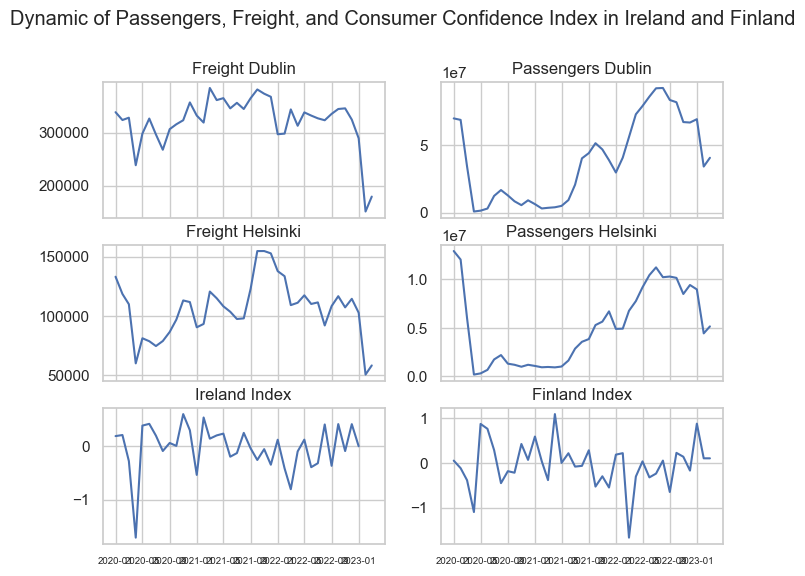

In [744]:
import matplotlib.pyplot as plt

# Change the format of data in column Month
merged_data_CapitalCS['Month'] = pd.to_datetime(merged_data_CapitalCS['Month'], format='%YM%m')

# Rest of the code remains the same
columns_to_plot = ['Freight Dublin', 'Passengers Dublin', 'Freight Helsinki', 'Passengers Helsinki', 'Ireland Index', 'Finland Index']

# Plotting line plots for selected columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6), sharex=True)

for i, column in enumerate(columns_to_plot):
    axes[i // 2, i % 2].plot(merged_data_CapitalCS['Month'], merged_data_CapitalCS[column])
    axes[i // 2, i % 2].set_title(column)

# Adjust the x-axis 
for ax in axes.flat:
    ax.tick_params(axis='x', labelsize='xx-small')

plt.suptitle('Dynamic of Passengers, Freight, and Consumer Confidence Index in Ireland and Finland', y=1)
plt.show()


In [54]:
import numpy as np
import plotly.express as px

In [55]:
#Determin min and max x values on the graph
xmin, xmax = min(merged_data_Capital['Freight Dublin']), max(merged_data_Capital['Freight Dublin'])

In [56]:
#Determin min and max y values on the graph
ymin, ymax = min(merged_data_Capital["Freight Helsinki"]), max(merged_data_Capital["Freight Helsinki"]) 

In [169]:
#Plot the graph
fig = px.scatter(
    merged_data_CapitalCS,
    x="Freight Dublin",
    y="Passengers Dublin",
    animation_frame="Month",
    hover_name="Month",
    color="Ireland Index",
    size="Ireland Index",
    title="Interactive Graph Ireland",
    labels={"Freight Dublin": "Freight Dublin", "Passengers Dublin": "Passengers Dublin"},
    range_x=[merged_data_CapitalCS["Freight Dublin"].min(), merged_data_CapitalCS["Freight Dublin"].max()],
    range_y=[merged_data_CapitalCS["Passengers Dublin"].min(), merged_data_CapitalCS["Passengers Dublin"].max()],
    color_continuous_scale="Plasma",
)

# Adjust animation speed
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])])])

# Show the figure
fig.show()

In [170]:
#Plot the graph
fig = px.scatter(
    merged_data_CapitalCS,
    x="Freight Helsinki",
    y="Passengers Helsinki",
    animation_frame="Month",
    hover_name="Month",
    color="Finland Index",
    size="Finland Index",
    title="Interactive Graph Finland",
    labels={"Freight Helsinki": "Freight Helsinki", "Passengers Helsinki": "Passengers Helsinki"},
    range_x=[merged_data_CapitalCS["Freight Helsinki"].min(), merged_data_CapitalCS["Freight Helsinki"].max()],
    range_y=[merged_data_CapitalCS["Passengers Helsinki"].min(), merged_data_CapitalCS["Passengers Helsinki"].max()],
    color_continuous_scale="Plasma",
)

# Adjust animation speed
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                method='animate', args=[None, dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)])])])

# Show the figure
fig.show()

# Statistics

Confidence intervals

In [60]:
import numpy as np
import scipy.stats as st
#what is average of Dublin passengers. 90% confidence?
X=merged_data_CapitalCS.iloc[:,2:3].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([30395308.67320818]), array([46939896.45499695]))

In [61]:
#what is average of Dublin Freight. 90% confidence?
X=merged_data_CapitalCS.iloc[:,1:2].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([308979.79098804]), array([334748.41414017]))

In [62]:
#what is average of Helsinki passengers. 90% confidence?
X=merged_data_CapitalCS.iloc[:,4:5].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([4001280.43551497]), array([6122312.17986965]))

In [63]:
#what is average of Helsinki Freight. 90% confidence?
X=merged_data_CapitalCS.iloc[:,3:4].values
#create  confidence interval using student T @90% confidence
st.t.interval(confidence=0.90, df=len(X)-1,loc=np.mean(X),scale=st.sem(X))

(array([99523.32386534]), array([112605.49664748]))

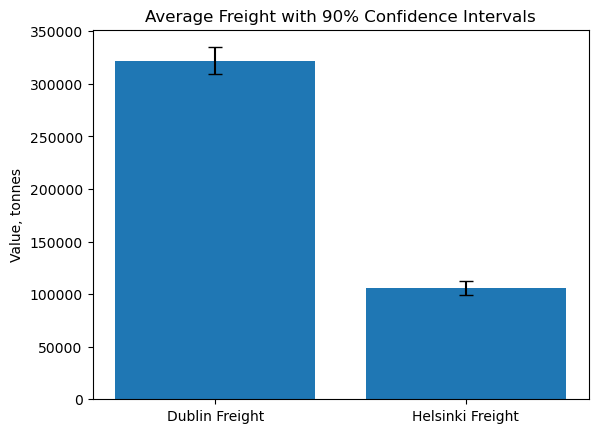

In [99]:
# Define data for Dublin Freight
X_dublin_freight = merged_data_CapitalCS['Freight Dublin'].values
conf_interval_dublin_freight = st.t.interval(confidence=0.90, df=len(X_dublin_freight)-1, loc=np.mean(X_dublin_freight), scale=st.sem(X_dublin_freight))

# Define data for Helsinki Freight
X_helsinki_freight = merged_data_CapitalCS['Freight Helsinki'].values
conf_interval_helsinki_freight = st.t.interval(confidence=0.90, df=len(X_helsinki_freight)-1, loc=np.mean(X_helsinki_freight), scale=st.sem(X_helsinki_freight))

# Plot bar chart with error bars
fig, ax = plt.subplots()

ax.bar(x=['Dublin Freight', 'Helsinki Freight'],
       height=[np.mean(X_dublin_freight), np.mean(X_helsinki_freight)],
       yerr=[[conf_interval_dublin_freight[1] - np.mean(X_dublin_freight),
              conf_interval_helsinki_freight[1] - np.mean(X_helsinki_freight)]],
       capsize=5)

ax.set_title('Average Freight with 90% Confidence Intervals')
ax.set_ylabel('Value, tonnes')
plt.show()

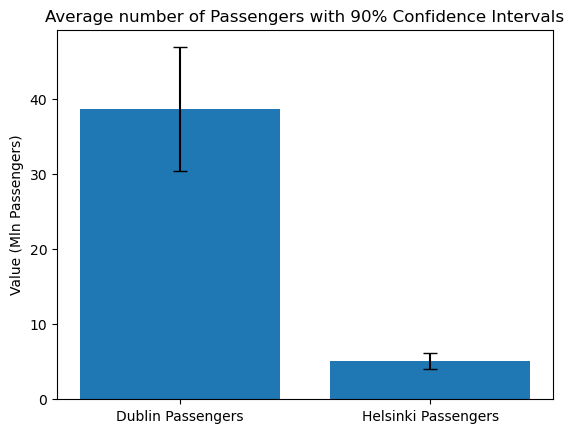

In [102]:
# Define data for Dublin Freight
X_helsinki_passengers = merged_data_CapitalCS['Passengers Helsinki'].values
conf_interval_helsinki_passengers = st.t.interval(confidence=0.90, df=len(X_helsinki_passengers)-1, loc=np.mean(X_helsinki_passengers), scale=st.sem(X_helsinki_passengers))

# Convert values to millions
X_dublin_passengers_in_millions = X_dublin_passengers / 1000000
X_helsinki_passengers_in_millions = X_helsinki_passengers / 1000000

# Convert confidence intervals to millions
conf_interval_dublin_passengers_in_millions = np.array(conf_interval_dublin_passengers) / 1000000
conf_interval_helsinki_passengers_in_millions = np.array(conf_interval_helsinki_passengers) / 1000000

# Plot bar chart with error bars
fig, ax = plt.subplots()

ax.bar(x=['Dublin Passengers', 'Helsinki Passengers'],
       height=[np.mean(X_dublin_passengers_in_millions), np.mean(X_helsinki_passengers_in_millions)],
       yerr=[[conf_interval_dublin_passengers_in_millions[1] - np.mean(X_dublin_passengers_in_millions),
              conf_interval_helsinki_passengers_in_millions[1] - np.mean(X_helsinki_passengers_in_millions)]],
       capsize=5)

ax.set_title('Average number of Passengers with 90% Confidence Intervals')
ax.set_ylabel('Value (Mln Passengers)')
plt.show()

Paramentric T-test, Shapiro normality test, Levene's test

In [103]:
from scipy.stats import ttest_ind

# Compare Passengers Dublin and Passengers Helsinki using t-test
data_dublin = merged_data_CapitalCS['Passengers Dublin']
data_helsinki = merged_data_CapitalCS['Passengers Helsinki']

# Check assumptions
# 1. Normality (Shapiro test)
_, p_dublin = st.shapiro(data_dublin)
_, p_helsinki = st.shapiro(data_helsinki)

# 2. Homogeneity of variances (Levene's test)
_, p_var = st.levene(data_dublin, data_helsinki)

# Perform t-test if assumptions are met
if p_dublin > 0.05 and p_helsinki > 0.05 and p_var > 0.05:
    t_stat, p_value = ttest_ind(data_dublin, data_helsinki)
    print(f"T-Test: t_stat = {t_stat}, p_value = {p_value}")
else:
    print("Parametric assumptions not met. Consider non-parametric tests.")

Parametric assumptions not met. Consider non-parametric tests.


Mannwhitneyu non paramentric test

In [108]:
from scipy.stats import mannwhitneyu
# Non Parametric test for Passengers:  Mann-Whitney U test for Passengers Dublin and Passengers Helsinki
u_stat, p_value_mannwhitney = mannwhitneyu(data_dublin, data_helsinki)
print(f"Mann-Whitney U Test: U_stat = {u_stat}, p_value = {p_value_mannwhitney}")

Mann-Whitney U Test: U_stat = 1518.0, p_value = 3.8703936962412065e-14


As p value less than 0.05 we reject H0.  At 5% significance level there is no evidance to say that the Passenger numbers in Dublin and Helsinki are equal

Chi-squared test

In [114]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Freight Helsinki'], merged_data_CapitalCS['Finland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1482.000000000001
P-value: 0.23780643207803892


p-value ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.

p-value 0.23780643207803892 indicates  P value is greater than 0.05 and we accept H0.  This indicates that Freight Helsinki is assoicated with Finland  Consumer Index

In [116]:
# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Passengers Helsinki'], merged_data_CapitalCS['Finland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1482.0000000000007
P-value: 0.23780643207804017


p-value 0.23780643207804017 indicates  P value is greater than0.05 and we accept H0.  This indicates that Passengers Helsinki is assoicated with Finland  Consumer Index

In [117]:
# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Passengers Dublin'], merged_data_CapitalCS['Ireland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1331.9999999999998
P-value: 0.2376975125175564


p-value 0.2376975125175564 indicates  P value is greater than0.05 and we accept H0.  This indicates that Passengers Dublin is assoicated with Ireland Consumer Index

In [118]:
# Contingency table
contingency_table = pd.crosstab(merged_data_CapitalCS['Freight Dublin'], merged_data_CapitalCS['Ireland Index'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 1110.0
P-value: 0.2565792513077524


p-value 0.2565792513077524 indicates  P value is greater than 0.05 and we accept H0.  This indicates that Freight Dublin is assoicated with Ireland Consumer Index

 Wilcoxon signed-rank test

In [122]:
from scipy.stats import wilcoxon
data = merged_data_CapitalCS[['Freight Dublin', 'Freight Helsinki']].dropna()

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(data['Freight Dublin'], data['Freight Helsinki'], zero_method='zsplit')

# Display the results
print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the two variables.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference.")

Wilcoxon Signed-Rank Test:
Statistic: 0.0
P-value: 3.637978807091713e-12
Reject the null hypothesis. There is a significant difference between the two variables.


In [126]:
data = merged_data_CapitalCS[['Ireland Index', 'Finland Index']].dropna()

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(data['Ireland Index'], data['Finland Index'], zero_method='zsplit')

# Display the results
print(f"Wilcoxon Signed-Rank Test:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the two variables.")
else:
    print("Fail to reject the null hypothesis, accept H0. There is not enough evidence to suggest a significant difference between Consumer indecies in Finland and Ireland.")

Wilcoxon Signed-Rank Test:
Statistic: 309.0
P-value: 0.530683740216773
Fail to reject the null hypothesis, accept H0. There is not enough evidence to suggest a significant difference between Consumer indecies in Finland and Ireland.


# Machine Learning

In [151]:
#Generate Synthetic dataset,contaning more values

original_data = pd.DataFrame({
    'Month':merged_data_CapitalCS['Month'],
    'Freight Dublin': merged_data_CapitalCS['Freight Dublin'],
    'Passengers Dublin': merged_data_CapitalCS['Passengers Dublin'],
    'Freight Helsinki': merged_data_CapitalCS['Freight Helsinki'],
    'Passengers Helsinki': merged_data_CapitalCS['Passengers Helsinki'],
    'Ireland Index': merged_data_CapitalCS['Ireland Index'],
    'Finland Index': merged_data_CapitalCS['Finland Index']
})
# Function to generate synthetic data using bootstrapping
def generate_synthetic_data(original_data, num_samples=1000):
    synthetic_data = pd.DataFrame()

    for column in original_data.columns:
        # Use bootstrapping to generate synthetic data for each column
        synthetic_column = np.random.choice(original_data[column], size=num_samples, replace=True)
        synthetic_data[column] = synthetic_column

    return synthetic_data

# Generate synthetic data with 1000 samples
synthetic_data = generate_synthetic_data(original_data, num_samples=1000)

# Ensure the synthetic dataset has the same structure as the original data
synthetic_data.columns = original_data.columns

# Validate synthetic data
print("Original Data:")
print(original_data.head())

print("\nSynthetic Data:")
print(synthetic_data.tail())


Original Data:
     Month  Freight Dublin  Passengers Dublin  Freight Helsinki  \
0  2020M01        0.221122           0.494358          0.303305   
1  2020M02        0.746347           0.520197          0.705900   
2  2020M03        0.745826           0.355145          0.588580   
3  2020M04        0.669241           0.460869          0.787377   
4  2020M05        0.434481           0.427679          0.494752   

   Passengers Helsinki  Ireland Index  Finland Index  
0             0.549873       0.555228       0.564111  
1             0.622183       0.349877       0.373554  
2             0.465927       0.331406       0.342000  
3             0.515457       0.138429       0.253844  
4             0.591294       0.432274       0.511385  

Synthetic Data:
       Month  Freight Dublin  Passengers Dublin  Freight Helsinki  \
995  2020M02        0.613058           0.427679          0.684977   
996  2020M06        0.684096           0.461314          0.705900   
997  2020M04        0.629270

In [149]:
#Undestand the dataset
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                1000 non-null   object 
 1   Freight Dublin       1000 non-null   float64
 2   Passengers Dublin    1000 non-null   float64
 3   Freight Helsinki     1000 non-null   float64
 4   Passengers Helsinki  1000 non-null   float64
 5   Ireland Index        1000 non-null   float64
 6   Finland Index        1000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [269]:
#to ensure that synthetic_data maintain the same  statistical properties and relationships as merged_data_CapitalCS
print(merged_data_CapitalCS.describe())
print(synthetic_data.describe())

       Freight Dublin  Passengers Dublin  Freight Helsinki  \
count       39.000000          39.000000         39.000000   
mean         0.526745           0.491933          0.544473   
std          0.179357           0.142282          0.138526   
min          0.221122           0.177584          0.303305   
25%          0.378804           0.399105          0.452707   
50%          0.545082           0.465835          0.540236   
75%          0.666655           0.590104          0.665539   
max          0.825388           0.802019          0.787377   

       Passengers Helsinki  Ireland Index  Finland Index  
count            39.000000      39.000000      39.000000  
mean              0.523092       0.447634       0.531910  
std               0.149656       0.124699       0.138819  
min               0.181633       0.115522       0.253844  
25%               0.447736       0.362497       0.435879  
50%               0.506348       0.459805       0.549007  
75%               0.608132  

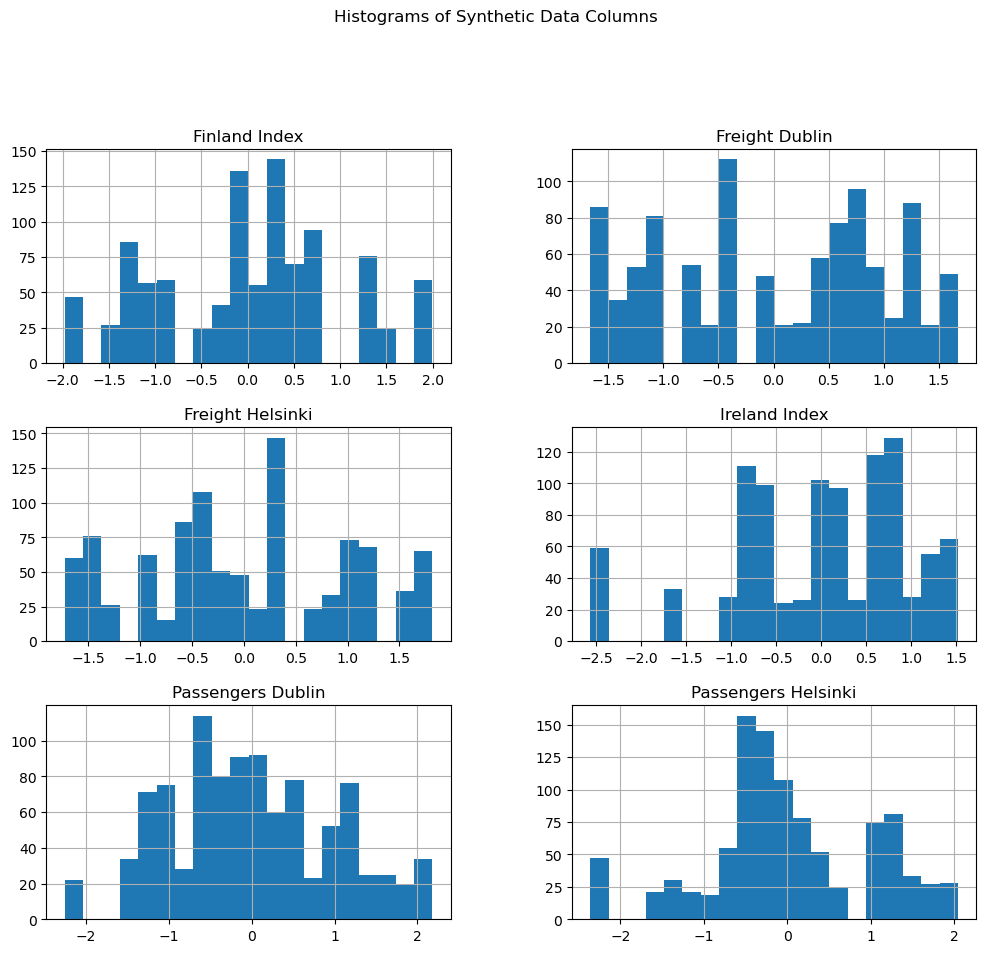

In [416]:
import matplotlib.pyplot as plt

# Plotting the dataset
columns_to_plot = synthetic_data.columns.difference(['Class'])

# Plotting histograms for selected columns
synthetic_data[columns_to_plot].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Synthetic Data Columns', y=1.02)
plt.show()

Random Forest and ANN Classification

In [272]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Define classes based on criteria:
threshold1 = 0.49 #mean of Passengers Dublin
threshold2 = 0.52 #mean of Freight Dublin
synthetic_data['Class'] = pd.cut(synthetic_data[['Freight Dublin', 'Passengers Dublin']].mean(axis=1), bins=[-float('inf'), threshold1, threshold2, float('inf')], labels=['Low', 'Medium', 'High'])

# Prepare data
X = synthetic_data[['Ireland Index']]
y = synthetic_data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (e.g., RandomForestClassifier)
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.495
              precision    recall  f1-score   support

        High       0.47      0.45      0.46        87
         Low       0.51      0.66      0.58        91
      Medium       0.00      0.00      0.00        22

    accuracy                           0.49       200
   macro avg       0.33      0.37      0.35       200
weighted avg       0.44      0.49      0.46       200



C:\Users\learn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\learn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\learn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [274]:
from sklearn.metrics import confusion_matrix

#  y_test contains the true labels,  y_pred contains the predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[39 48  0]
 [31 60  0]
 [13  9  0]]


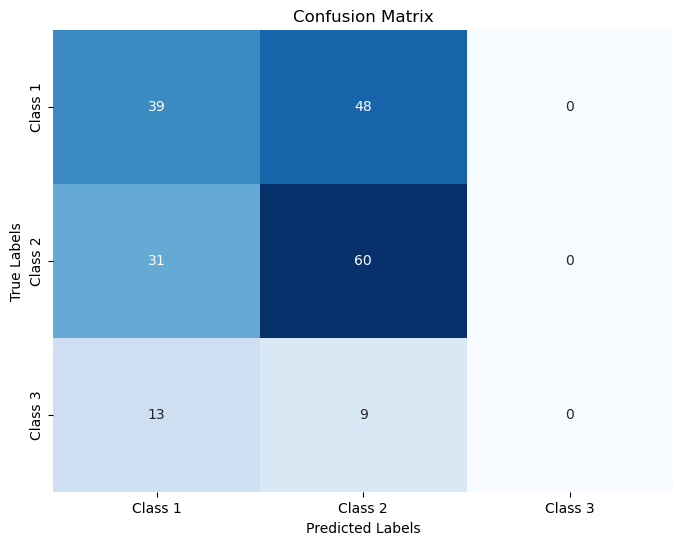

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [278]:
from keras.models import Sequential
from keras import models
from keras import layers

# Start creating neural network
network = models.Sequential()

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu", input_shape = (7,)))

# Added fully connected layer using ReLU as activation function
network.add(layers.Dense(units = 16, activation = "relu"))

# Added fully connected layer that uses sigmoid function as activation function
network.add(layers.Dense(units = 1, activation = "sigmoid"))

#Compile neural network
network . compile ( loss = "binary_crossentropy" , 
                optimizer = "rmsprop" ,   
                metrics = [ "accuracy" ]) 

In [280]:
pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [281]:
#Check the dataset
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month                1000 non-null   object  
 1   Freight Dublin       1000 non-null   float64 
 2   Passengers Dublin    1000 non-null   float64 
 3   Freight Helsinki     1000 non-null   float64 
 4   Passengers Helsinki  1000 non-null   float64 
 5   Ireland Index        1000 non-null   float64 
 6   Finland Index        1000 non-null   float64 
 7   Class                1000 non-null   category
dtypes: category(1), float64(6), object(1)
memory usage: 55.9+ KB


In [284]:
from sklearn import preprocessing

# select all categorical variables
synthetic_data_categorical = synthetic_data.select_dtypes(include=['category'])
synthetic_data_categorical.head()

,Class
0,Low
1,Low
2,Low
3,High
4,High


In [285]:
# Apply Label encoder to synthetic_data_categorical

label_encoder = preprocessing.LabelEncoder()
synthetic_data_categorical = synthetic_data_categorical.apply(label_encoder.fit_transform)
synthetic_data_categorical.head()

,Class
0,1
1,1
2,1
3,0
4,0


In [286]:
# concat synthetic_data_categorical with original synthetic_data
synthetic_data = synthetic_data.drop(synthetic_data_categorical.columns, axis=1)
synthetic_data = pd.concat([synthetic_data, synthetic_data_categorical], axis=1)
synthetic_data.head()

,Month,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index,Class
0,2020M10,0.234012,0.494358,0.457730,0.515457,0.516551,0.403583,1
1,2021M10,0.241521,0.662200,0.555283,0.395985,0.599521,0.807084,1
2,2020M03,0.278061,0.636981,0.681633,0.715835,0.372547,0.584358,1
3,2020M10,0.503653,0.736423,0.739074,0.480797,0.316011,0.514954,0
4,2020M07,0.599574,0.741417,0.421175,0.447496,0.382516,0.527795,0


In [291]:
#data standardization  to transform the numeric variables so that each variable has zero mean and unit variance.
from sklearn import preprocessing
# Extract numeric columns only
numeric_columns = synthetic_data.select_dtypes(include='number')

# Scale numeric columns
synthetic_data_scaled = preprocessing.scale(numeric_columns)

numeric_columns = synthetic_data.select_dtypes(include='number')


In [292]:
# Create a DataFrame with the scaled data and the corresponding columns
synthetic_data_scaled = pd.DataFrame(synthetic_data_scaled, columns=numeric_columns.columns)

In [293]:
#Make sure two dataset are equal
synthetic_data_scaled['Class'] = synthetic_data['Class']
synthetic_data = synthetic_data_scaled

synthetic_data.head()

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index,Class
0,-1.591505,-0.005598,-0.595960,-0.099802,0.598551,-0.902345,1
1,-1.550049,1.186492,0.118078,-0.908248,1.253489,1.996856,1
2,-1.348325,1.007377,1.042893,1.256119,-0.538164,0.396546,1
3,-0.102908,1.713660,1.463333,-0.334343,-0.984438,-0.102126,0
4,0.426640,1.749131,-0.863520,-0.559681,-0.459470,-0.009864,0


In [294]:
#Train the data
from sklearn.model_selection import train_test_split
X = synthetic_data.loc[:, synthetic_data.columns != 'Class']
y = synthetic_data.loc[:, 'Class']

# Display the scaled data for independent columms
X

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index
0,-1.591505,-0.005598,-0.595960,-0.099802,0.598551,-0.902345
1,-1.550049,1.186492,0.118078,-0.908248,1.253489,1.996856
2,-1.348325,1.007377,1.042893,1.256119,-0.538164,0.396546
3,-0.102908,1.713660,1.463333,-0.334343,-0.984438,-0.102126
4,0.426640,1.749131,-0.863520,-0.559681,-0.459470,-0.009864
...,...,...,...,...,...,...
995,0.501078,-0.479186,1.067371,-0.373488,0.748289,1.332520
996,0.893257,-0.240290,1.220515,-0.616417,-0.854139,0.010884
997,0.590579,2.179552,0.243226,-0.138570,0.878708,0.217092
998,0.193392,-0.297393,-0.455677,0.432228,0.150623,-1.118104


In [295]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [296]:
#undestand the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [301]:
# Fixing a random seed ensures reproducible results

import random
import tensorflow
tensorflow.random.set_seed(9)
np.random.seed(1)
random.seed(1)

In [335]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(6,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Train the model
network.fit(X_train_reshaped, y_train, epochs=200)

Epoch 1/200


25/25 [==============================] - 1s 2ms/step - loss: 0.6789 - accuracy: 0.4800
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.5387
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.6087
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.6700
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7163
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.7538
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.7925
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8087
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8275
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.8275
Epoch 1

Polynomal Regression

Mean Squared Error: 0.94
R-squared: 0.01


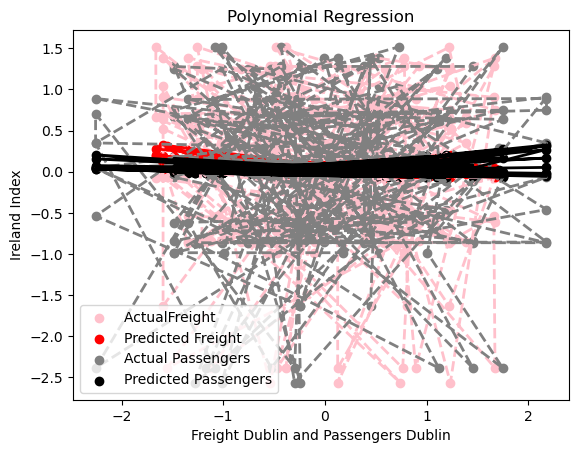

In [376]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# assigning variables 'Freight Dublin', 'Passengers Dublin', and 'Ireland Index'

# Extracting features and target variable
X = synthetic_data[['Freight Dublin', 'Passengers Dublin']]
y = synthetic_data['Ireland Index']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Linear regression with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

plt.scatter(X_test['Freight Dublin'], y_test, color='pink', label='ActualFreight ')
plt.scatter(X_test['Freight Dublin'], y_pred, color='red', label='Predicted Freight')
plt.scatter(X_test['Passengers Dublin'], y_test, color='grey', label='Actual Passengers')
plt.scatter(X_test['Passengers Dublin'], y_pred, color='black', label='Predicted Passengers')

# Connect the points with lines
plt.plot(X_test['Freight Dublin'], y_test, color='pink', linestyle='dashed', linewidth=2)
plt.plot(X_test['Freight Dublin'], y_pred, color='red', linewidth=2)
plt.plot(X_test['Passengers Dublin'], y_test, color='grey', linestyle='dashed', linewidth=2)
plt.plot(X_test['Passengers Dublin'], y_pred, color='black', linewidth=2)

plt.xlabel('Freight Dublin and Passengers Dublin')
plt.ylabel('Ireland Index')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

In [377]:
from sklearn.linear_model import Ridge

# Ridge regression with polynomial features
alpha = 1.0 
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_poly, y_train)

# Predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_poly)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print Ridge performance metrics
print(f'Ridge Mean Squared Error: {mse_ridge:.2f}')
print(f'Ridge R-squared: {r2_ridge:.2f}')

Ridge Mean Squared Error: 0.94
Ridge R-squared: 0.01


Logistics Regression

In [378]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
synthetic_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Freight Dublin,Passengers Dublin,Freight Helsinki,Passengers Helsinki,Ireland Index,Finland Index,Class
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,3.055334e-16,4.440892e-16,1.598721e-16,-1.865175e-16,-9.769963e-17,2.096101e-16,0.616000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,0.639494
min,-1.662666e+00,-2.255476e+00,-1.726268e+00,-2.358727e+00,-2.567016e+00,-1.978235e+00,0.000000
25%,-1.018691e+00,-6.762313e-01,-6.384957e-01,-5.564323e-01,-7.171089e-01,-8.218204e-01,0.000000
50%,1.258069e-01,-2.055341e-01,-7.531345e-02,-1.385701e-01,1.502114e-01,1.088392e-02,1.000000
75%,8.112441e-01,7.253212e-01,9.031490e-01,6.223955e-01,7.482894e-01,7.143518e-01,1.000000
90%,1.234047e+00,1.455399e+00,1.463333e+00,1.256119e+00,1.253489e+00,1.347699e+00,1.000000
95%,1.389628e+00,1.749131e+00,1.692220e+00,1.789683e+00,1.384343e+00,1.849739e+00,2.000000
99%,1.673279e+00,2.179552e+00,1.816883e+00,2.045672e+00,1.517130e+00,1.996856e+00,2.000000


In [379]:
# Adding up the missing values (column-wise)
synthetic_data.isnull().sum()

Freight Dublin         0
Passengers Dublin      0
Freight Helsinki       0
Passengers Helsinki    0
Ireland Index          0
Finland Index          0
Class                  0
dtype: int64

In [380]:
from sklearn.model_selection import train_test_split
# Putting feature variables to X
X = synthetic_data[['Freight Dublin', 'Passengers Dublin']]  

# Putting response variable to y
y = synthetic_data['Ireland Index']
X.shape, y.shape


((1000, 2), (1000,))

In [381]:
y.head()

0    0.598551
1    1.253489
2   -0.538164
3   -0.984438
4   -0.459470
Name: Ireland Index, dtype: float64

In [382]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
X_train.shape

(700, 2)

In [383]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [384]:
import statsmodels.api as sm

In [385]:
X_train.head

<bound method NDFrame.head of      Freight Dublin  Passengers Dublin
420       -1.662666          -0.525506
278        0.742404          -1.483824
218        1.234047           2.179552
363        0.893257           0.864579
850        0.765354           0.725321
..              ...                ...
855       -1.591505           1.455399
871       -0.102908          -0.670332
835       -1.591505          -0.668431
792        0.924636           0.360089
520        0.742404           1.007377

[700 rows x 2 columns]>

In [386]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\learn\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp

C:\Users\learn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning:

invalid value encountered in log

C:\Users\learn\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:1014: RuntimeWarning:

divide by zero encountered in log

C:\Users\learn\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Ireland Index   No. Observations:                  700
Model:                            GLM   Df Residuals:                      697
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 01 Jan 2024   Deviance:                       49503.
Time:                        16:20:47   Pearson chi2:                 3.28e+18
No. Iterations:                     8   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.479e+14   2.54e+06  -1.77e+08      0.000   -4.48e+14   -4.48e+14
Freight Dublin    -2.144e+14   2.54e+06  -8.42e+07      0.000   -2.14e+14   -2.14e+14
Passengers Dublin -7.044e+13   2.56e+06  -2.75e+07      0.000   -7.04e+13   -7.04e+13
=====================================================================================
"""

C:\Users\learn\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning:

overflow encountered in exp



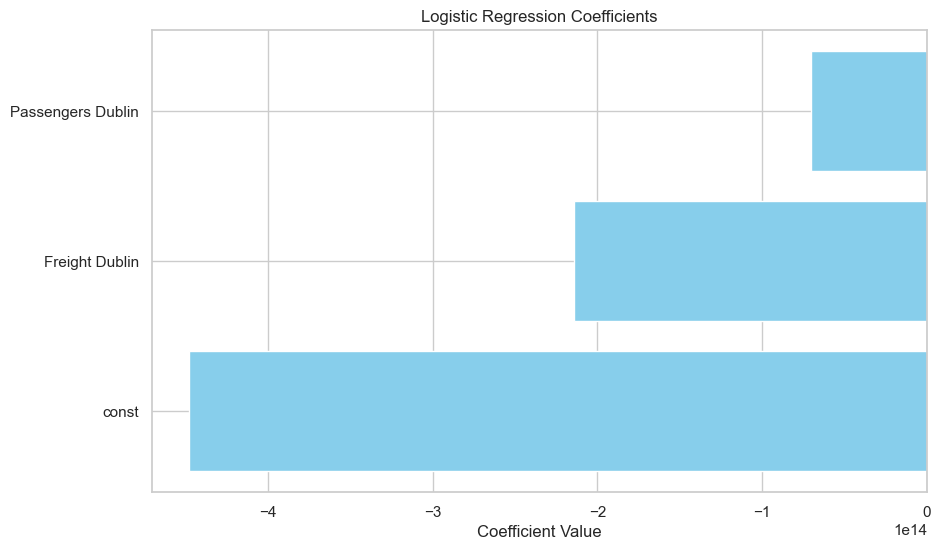

In [420]:
import matplotlib.pyplot as plt
import numpy as np

# logistic regression model
coef_values = logm1.fit().params

# Extract feature names and corresponding coefficients
feature_names = coef_values.index
coefficients = coef_values.values

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

Sentiment analysis

In [792]:
#Read the file in excel format
Reviews = pd.read_excel('Airline_reviews.xlsx')

In [793]:
#Transform the excel into csv
Reviews.to_csv('Airline_reviews.csv', index=False)

In [845]:
Reviews.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [846]:
#drop null values
Reviews_cleaned = Reviews.dropna()

In [847]:
#Check the dataset
Reviews_cleaned.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


In [848]:
#Check the ariline included in the dataset
unique_airlines = Reviews_cleaned['airline'].unique()
print(unique_airlines)

['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airways' 'Wizz A

In [849]:
# List of airlines to keep
airlines_to_keep = ['Aer Lingus', 'Ryanair', 'Finnair']

# Filter the DataFrame
filtered_reviews = Reviews_cleaned[Reviews_cleaned['airline'].isin(airlines_to_keep)]

#Filter on the relevant columns
columns_to_keep = ['airline', 'customer_review', 'date_flown', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']

# Create a new DataFrame with only the selected columns
filtered_reviews_subset = filtered_reviews[columns_to_keep]

# Print the new DataFrame
print(filtered_reviews_subset)


           airline                                    customer_review  \
57281      Finnair  âœ… Trip Verified | Bangkok to Amsterdam via H...   
57283      Finnair  âœ… Trip Verified | Helsinki to Bangkok. Finna...   
57285      Finnair  âœ… Trip Verified | Dublin to Bangkok via Hels...   
57289      Finnair  âœ… Trip Verified | Moscow to Chicago via Hels...   
57291      Finnair  Not Verified | New York to Tokyo via Helsinki....   
...            ...                                                ...   
124152  Aer Lingus  EI134 (06 July 15) and EI135 (27 July 15) were...   
124160  Aer Lingus  I had a connection in Dublin for 2 hours, whic...   
124170  Aer Lingus  Very good experience. Check-in and boarding we...   
124174  Aer Lingus  I had a very pleasant experience flying with A...   
124176  Aer Lingus  SFO-DUB, LHR-DUB-SFO. Ground staff excellent. ...   

                 date_flown  cabin_service  food_bev  entertainment  \
57281   2019-05-01 00:00:00            4.0       4.0

In [850]:
#Identify columns to keep
columns_to_keep = ['airline', 'customer_review', 'date_flown', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']

# Create a new DataFrame with only the selected columns
filtered_reviews_subset = filtered_reviews[columns_to_keep]

# Print the new DataFrame
filtered_reviews_subset.head()

,airline,customer_review,date_flown,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
57281,Finnair,âœ… Trip Verified | Bangkok to Amsterdam via H...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,yes
57283,Finnair,âœ… Trip Verified | Helsinki to Bangkok. Finna...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,yes
57285,Finnair,âœ… Trip Verified | Dublin to Bangkok via Hels...,2019-05-01 00:00:00,3.0,1.0,2.0,3.0,2.0,no
57289,Finnair,âœ… Trip Verified | Moscow to Chicago via Hels...,October 2018,5.0,3.0,4.0,5.0,4.0,yes
57291,Finnair,Not Verified | New York to Tokyo via Helsinki....,April 2019,4.0,4.0,3.0,4.0,4.0,yes


In [851]:
# Replace "Yes" with 1 and "No" with 0 in the "recommended" column using .loc
filtered_reviews_subset.loc[:, 'recommended'] = filtered_reviews_subset['recommended'].str.lower().replace({'yes': 1, 'no': 0})

# Convert the "recommended" column to float64
filtered_reviews_subset.loc[:, 'recommended'] = filtered_reviews_subset['recommended'].astype(float)

# Split the "customer_review" column based on the "|" sign and get the second part (index 1)
filtered_reviews_subset['customer_review'] = filtered_reviews_subset['customer_review'].str.split('|').str[1]

filtered_reviews_subset.head()

C:\Users\learn\AppData\Local\Temp\ipykernel_25324\4060987405.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,airline,customer_review,date_flown,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
57281,Finnair,Bangkok to Amsterdam via Helsinki. Once again...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,1.0
57283,Finnair,Helsinki to Bangkok. Finnair has been our cho...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,1.0
57285,Finnair,Dublin to Bangkok via Helsinki. Finnair has b...,2019-05-01 00:00:00,3.0,1.0,2.0,3.0,2.0,0.0
57289,Finnair,Moscow to Chicago via Helsinki. I liked this ...,October 2018,5.0,3.0,4.0,5.0,4.0,1.0
57291,Finnair,New York to Tokyo via Helsinki. Very positive...,April 2019,4.0,4.0,3.0,4.0,4.0,1.0


In [852]:
#Undestand the dataset
filtered_reviews_subset.describe()

,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,3.662921,2.955056,2.861423,3.168539,3.453184
std,1.370559,1.478493,1.357065,1.397387,1.390306
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,3.000000,3.000000,4.000000
75%,5.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [853]:
#Look at the data types
filtered_reviews_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 57281 to 124176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          267 non-null    object 
 1   customer_review  164 non-null    object 
 2   date_flown       267 non-null    object 
 3   cabin_service    267 non-null    float64
 4   food_bev         267 non-null    float64
 5   entertainment    267 non-null    float64
 6   ground_service   267 non-null    float64
 7   value_for_money  267 non-null    float64
 8   recommended      267 non-null    object 
dtypes: float64(5), object(4)
memory usage: 20.9+ KB


In [854]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\learn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [855]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [856]:
#generate stopwords
filtered_reviews_subset.loc[:, 'stopwords'] = filtered_reviews_subset['customer_review'].apply(lambda x: len([word for word in str(x).split() if word in stop]))
filtered_reviews_subset[['customer_review','stopwords']].head()

C:\Users\learn\AppData\Local\Temp\ipykernel_25324\3946353754.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_review,stopwords
57281,Bangkok to Amsterdam via Helsinki. Once again...,13
57283,Helsinki to Bangkok. Finnair has been our cho...,29
57285,Dublin to Bangkok via Helsinki. Finnair has b...,39
57289,Moscow to Chicago via Helsinki. I liked this ...,22
57291,New York to Tokyo via Helsinki. Very positive...,23


In [862]:
# Check for NaN values and replace them with an empty string
filtered_reviews_subset['customer_review'] = filtered_reviews_subset['customer_review'].fillna('')

# Apply text processing only to non-NaN values
filtered_reviews_subset['filtered_reviews_subset'] = filtered_reviews_subset['customer_review'].apply(
    lambda x: " ".join(x for x in str(x).split() if x not in stop)
)

# Use .loc to avoid SettingWithCopyWarning
filtered_reviews_subset.loc[:, 'customer_review'] = filtered_reviews_subset['filtered_reviews_subset']

# Display the results
filtered_reviews_subset.head()

C:\Users\learn\AppData\Local\Temp\ipykernel_25324\4274883710.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\learn\AppData\Local\Temp\ipykernel_25324\4274883710.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,airline,customer_review,date_flown,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,stopwords,filtered_reviews_subset,sentiment
57281,Finnair,Bangkok Amsterdam via Helsinki. Once Finnair b...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,1.0,13,Bangkok Amsterdam via Helsinki. Once Finnair b...,"(-0.03333333333333335, 0.46666666666666673)"
57283,Finnair,Helsinki Bangkok. Finnair choice European flig...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,1.0,29,Helsinki Bangkok. Finnair choice European flig...,"(0.32166666666666666, 0.5866666666666667)"
57285,Finnair,Dublin Bangkok via Helsinki. Finnair extremely...,2019-05-01 00:00:00,3.0,1.0,2.0,3.0,2.0,0.0,39,Dublin Bangkok via Helsinki. Finnair extremely...,"(0.1536458333333333, 0.6638888888888889)"
57289,Finnair,Moscow Chicago via Helsinki. I liked flight. G...,October 2018,5.0,3.0,4.0,5.0,4.0,1.0,22,Moscow Chicago via Helsinki. I liked flight. G...,"(0.49000000000000005, 0.5900000000000001)"
57291,Finnair,New York Tokyo via Helsinki. Very positive exp...,April 2019,4.0,4.0,3.0,4.0,4.0,1.0,23,New York Tokyo via Helsinki. Very positive exp...,"(0.3065151515151515, 0.613030303030303)"


In [858]:
from textblob import TextBlob

In [859]:
#Sentiment analysis
filtered_reviews_subset["sentiment"] = filtered_reviews_subset["filtered_reviews_subset"].apply(
    lambda x: TextBlob(str(x)).sentiment
)
filtered_reviews_subset.head()

C:\Users\learn\AppData\Local\Temp\ipykernel_25324\415270220.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,airline,customer_review,date_flown,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,stopwords,filtered_reviews_subset,sentiment
57281,Finnair,Bangkok Amsterdam via Helsinki. Once Finnair b...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,1.0,13,Bangkok Amsterdam via Helsinki. Once Finnair b...,"(-0.03333333333333335, 0.46666666666666673)"
57283,Finnair,Helsinki Bangkok. Finnair choice European flig...,2019-05-01 00:00:00,4.0,4.0,4.0,5.0,4.0,1.0,29,Helsinki Bangkok. Finnair choice European flig...,"(0.32166666666666666, 0.5866666666666667)"
57285,Finnair,Dublin Bangkok via Helsinki. Finnair extremely...,2019-05-01 00:00:00,3.0,1.0,2.0,3.0,2.0,0.0,39,Dublin Bangkok via Helsinki. Finnair extremely...,"(0.1536458333333333, 0.6638888888888889)"
57289,Finnair,Moscow Chicago via Helsinki. I liked flight. G...,October 2018,5.0,3.0,4.0,5.0,4.0,1.0,22,Moscow Chicago via Helsinki. I liked flight. G...,"(0.49000000000000005, 0.5900000000000001)"
57291,Finnair,New York Tokyo via Helsinki. Very positive exp...,April 2019,4.0,4.0,3.0,4.0,4.0,1.0,23,New York Tokyo via Helsinki. Very positive exp...,"(0.3065151515151515, 0.613030303030303)"


In [861]:
#To look at unique values in sentiment column
unique_values = filtered_reviews_subset['sentiment'].unique()
print(unique_values)

[Sentiment(polarity=-0.03333333333333335, subjectivity=0.46666666666666673)
 Sentiment(polarity=0.32166666666666666, subjectivity=0.5866666666666667)
 Sentiment(polarity=0.1536458333333333, subjectivity=0.6638888888888889)
 Sentiment(polarity=0.49000000000000005, subjectivity=0.5900000000000001)
 Sentiment(polarity=0.3065151515151515, subjectivity=0.613030303030303)
 Sentiment(polarity=0.1625, subjectivity=0.41250000000000003)
 Sentiment(polarity=0.24000000000000002, subjectivity=0.51)
 Sentiment(polarity=-0.05178571428571427, subjectivity=0.2208333333333333)
 Sentiment(polarity=0.18379629629629635, subjectivity=0.4546296296296297)
 Sentiment(polarity=0.23294642857142858, subjectivity=0.6026190476190475)
 Sentiment(polarity=0.15878787878787878, subjectivity=0.5690909090909091)
 Sentiment(polarity=0.19999999999999998, subjectivity=0.4714285714285714)
 Sentiment(polarity=0.22412280701754383, subjectivity=0.418859649122807)
 Sentiment(polarity=0.27375757575757576, subjectivity=0.546969696

In [502]:
#Use vectoriser and assign variables
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 20)
x = vectorizer.fit_transform(filtered_reviews_subset['customer_review'])
y = filtered_reviews_subset['recommended']

In [504]:
#Check the outcome
customer_reviews = vectorizer.transform(['Dublin to Los Angeles. The airline has less frills than most but I experienced economy outbound and inbound business. I would have to say business class is much better. The flight attendants in the business class cabin are attentive and helpful when you need something. The food was fine but I think the second meal could of been improved. The choice of wine was good. Flat seats were comfortable as most business class seats go. I am glad I upgraded and was able too. Aer Lingus staff are very helpful at the check in Kiosks.'])
customer_reviews = vectorizer.inverse_transform(customer_reviews)
print(customer_reviews)

[array(['aer', 'aer lingus', 'airline', 'attendants', 'better', 'business',
       'business class', 'cabin', 'check', 'choice', 'class',
       'comfortable', 'dublin', 'economy', 'flight', 'food', 'good',
       'lingus', 'meal', 'seats', 'staff'], dtype='<U14')]


In [505]:
vectorizer

CountVectorizer(min_df=20, ngram_range=(1, 2), stop_words='english')

In [506]:
x

<267x82 sparse matrix of type '<class 'numpy.int64'>'
	with 3019 stored elements in Compressed Sparse Row format>

In [510]:
#Logistics regression abnalysis
from sklearn.model_selection import train_test_split

# 
X = filtered_reviews_subset[['cabin_service', "food_bev","entertainment","ground_service","value_for_money"]]  
y = filtered_reviews_subset['recommended']  

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the variables
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((267, 82), (267,), (213, 5), (54, 5), (213,), (54,))

In [511]:
#Train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

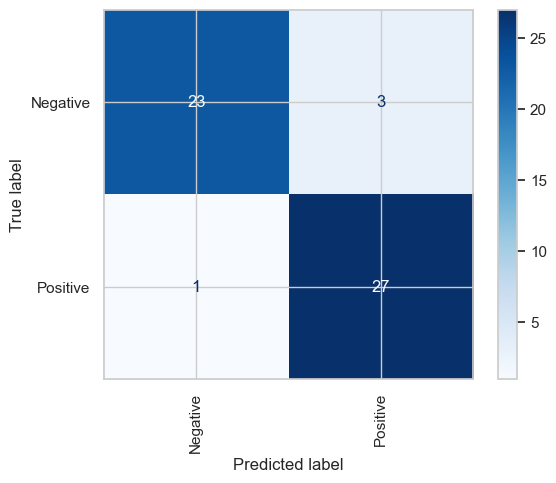

In [512]:
#Confidence matrix
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical')

In [548]:
#Topic modelling
!pip install gensim


from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# filter on 'customer_review' column
reviews_df = filtered_reviews_subset[['customer_review']]

# Download NLTK resources (stopwords and WordNet)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenization and lowercase
    tokens = [token for token in tokens if token.isalpha()]  
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  
    return tokens

# Apply preprocessing to each review
reviews_df['processed_review'] = reviews_df['customer_review'].apply(preprocess)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(reviews_df['processed_review'])
corpus = [dictionary.doc2bow(tokens) for tokens in reviews_df['processed_review']]


num_topics = 10  
passes = 20  

lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

# Get topics for each document
topics = lda_model.get_document_topics(corpus)

# Add topics to the DataFrame using .loc
for i in range(num_topics):
    reviews_df.loc[:, f'Topic_{i + 1}'] = [topic[i][1] if len(topic) > i else 0 for topic in topics]

# Extract and print the words associated with each topic
for i in range(num_topics):
    topic_words = [str(word) for word, prob in lda_model.show_topic(i)]  
    print(f"Topic {i + 1}: {', '.join(topic_words)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\learn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\learn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\learn\AppData\Local\Temp\ipykernel_25324\3698797922.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\learn\AppData\Local\Temp\ipykernel_25324\3698797922.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Topic 1: flight, seat, aer, lingus, customer, service, ticket, agent, finnair, dublin
Topic 2: flight, business, finnair, class, helsinki, seat, service, good, food, time
Topic 3: flight, nice, helsinki, good, crew, would, finnair, cabin, one, seat
Topic 4: flight, seat, crew, cabin, would, u, one, staff, time, ryanair
Topic 5: flight, seat, dublin, time, lingus, aer, hour, food, drink, airline
Topic 6: service, finnair, helsinki, experience, flight, food, good, cabin, drink, class
Topic 7: seat, flight, time, helsinki, food, drink, free, last, service, meal
Topic 8: flight, seat, dublin, finnair, helsinki, plane, class, hel, airline, flew
Topic 9: flight, cabin, morning, finnair, airline, service, london, delay, coffee, bag
Topic 10: seat, finnair, flight, helsinki, service, airline, good, staff, u, check


C:\Users\learn\AppData\Local\Temp\ipykernel_25324\3698797922.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Dash

In [783]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input,Output
import plotly.express as px

In [828]:
app = dash.Dash(__name__)

# Define the available options for X and Y axes
available_axes = ['cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', "recommended"]

app.layout = html.Div([
    html.H3("Dash"),
    dcc.Graph(id="graph"),
    html.Label([
        "X-axis",
        dcc.Dropdown(
            id="x-axis-dropdown", clearable=False,
            value="value_for_money", options=[
                {"label": axis, "value": axis}
                for axis in available_axes
            ]
        )
    ]),
    html.Label([
        "Y-axis",
        dcc.Dropdown(
            id="y-axis-dropdown", clearable=False,
            value="recommended", options=[
                {"label": axis, "value": axis}
                for axis in available_axes
            ]
        )
    ]),
])

@app.callback(
    Output("graph", "figure"),
    [Input("x-axis-dropdown", "value"), Input("y-axis-dropdown", "value")]
)
def update_figure(x_axis, y_axis):
    return px.scatter(
        filtered_reviews_subset, x=x_axis, y=y_axis, color="airline",
        color_continuous_scale="plasma",
        render_mode="web_gl", title="Airline Review"
    )

app.run_server(port=8060, mode="inline")


In [880]:
#Dash with different parameters
# Remove leading/trailing whitespaces from column names
filtered_reviews_subset.columns = filtered_reviews_subset.columns.str.strip()

# Define the available options for X and Y axes
available_axes = ['Polarity', 'Subjectivity', 'recommended']

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H3("Dash"),
    dcc.Graph(id="graph"),
    html.Label([
        "X-axis",
        dcc.Dropdown(
            id="x-axis-dropdown", clearable=False,
            value="Polarity", options=[
                {"label": axis, "value": axis}
                for axis in available_axes
            ]
        )
    ]),
    html.Label([
        "Y-axis",
        dcc.Dropdown(
            id="y-axis-dropdown", clearable=False,
            value="Subjectivity", options=[
                {"label": axis, "value": axis}
                for axis in available_axes
            ]
        )
    ]),
])

@app.callback(
    Output("graph", "figure"),
    [Input("x-axis-dropdown", "value"), Input("y-axis-dropdown", "value")]
)
def update_figure(x_axis, y_axis):
    return px.scatter(
        filtered_reviews_subset, x=x_axis, y=y_axis, color="airline",
        color_continuous_scale="plasma",
        render_mode="web_gl", title="Sentiment"
    )

if __name__ == '__main__':
    app.run_server(port=8060, mode="inline")

# Programming 

In [ ]:
Upload JSON file

In [661]:
# Load the JSON file as a dictionary
with open('Helsinki.json', 'r') as file:
    data = json.load(file)

# Assuming "data" is the key containing the relevant data
df = pd.DataFrame(data['data'])

# Display the first few rows of the DataFrame
df.head()

,key,values
0,"[2023M01, EFHK]","[1121174, 12845]"
1,"[2023M02, EFHK]","[1107066, 12696]"
2,"[2023M03, EFHK]","[1287152, 14613]"
3,"[2023M04, EFHK]","[1221590, 13826]"
4,"[2023M05, EFHK]","[1363899, 15184]"


In [662]:

# Remove 'EFNK' from the "key" column and rename it to "Month"
df['Month'] = df['key'].apply(lambda x: x[0])
df = df.drop('key', axis=1)

# Split the "values" column into two columns
df[['passengers', 'freight']] = pd.DataFrame(df['values'].tolist(), index=df.index)

# Drop the original "values" column
df = df.drop('values', axis=1)

# Display the modified DataFrame
print(df)

      Month passengers freight
0   2023M01    1121174   12845
1   2023M02    1107066   12696
2   2023M03    1287152   14613
3   2023M04    1221590   13826
4   2023M05    1363899   15184
5   2023M06    1414063   15395
6   2023M07    1462000   14177
7   2023M08    1365176   12470
8   2023M09    1330788   14525
9   2023M10    1349604   15902
10  2023M11    1149140   15542


In [ ]:
# Testing and Optimasation strategy

In [889]:
#Example 1 Sentiment analysis
# Remove leading/trailing whitespaces from column names
filtered_reviews_subset.columns = filtered_reviews_subset.columns.str.strip()

# Define the available options for X and Y axes
available_axes = ['Polarity', 'Subjectivity', 'recommended']

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H3("Sentiment Analysis Dashboard"),
    dcc.Graph(id="graph"),
    html.Label([
        "X-axis",
        dcc.Dropdown(
            id="x-axis-dropdown", clearable=False,
            value="Polarity", options=[
                {"label": axis, "value": axis}
                for axis in available_axes
            ]
        )
    ]),
    html.Label([
        "Y-axis",
        dcc.Dropdown(
            id="y-axis-dropdown", clearable=False,
            value="Subjectivity", options=[
                {"label": axis, "value": axis}
                for axis in available_axes
            ]
        )
    ]),
])

# Define the callback to update the figure
@app.callback(
    Output("graph", "figure"),
    [Input("x-axis-dropdown", "value"), Input("y-axis-dropdown", "value")]
)
def update_figure(x_axis, y_axis):
    # Use try-except block for error handling
    try:
        # Create scatter plot using Plotly Express
        figure = px.scatter(
            filtered_reviews_subset, x=x_axis, y=y_axis, color="airline",
            color_continuous_scale="plasma",
            render_mode="web_gl", title="Sentiment"
        )
        return figure

    except Exception as e:
        # Log and handle any errors 
        print(f"Error updating figure: {e}")
        return px.scatter()  # Return an empty plot in case of an error

# Run the app if the script is executed directly
if __name__ == '__main__':
    # Use a try-except block for app.run_server to handle potential issues
    try:
        app.run_server(port=8060, mode="inline")

    except Exception as e:
        print(f"Error running the app: {e}")